# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [1]:
import pandas as pd
import numpy as np

In [3]:
transactions = pd.read_csv("../project_data/project_transactions.csv")

In [4]:
transactions.tail()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0
2146310,1598,42305362535,711,14055192,1,6.99,3228,0.00,102,0.0,0.0


In [5]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [6]:
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [7]:
transactions[["household_key","PRODUCT_ID"]].nunique()

household_key     2099
PRODUCT_ID       84138
dtype: int64

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [8]:
transactions = transactions.assign(total_discount = (transactions["RETAIL_DISC"] + transactions["COUPON_DISC"]),
                percentage_disc  = ((transactions["RETAIL_DISC"] + transactions["COUPON_DISC"])/transactions["SALES_VALUE"]).abs()
               ).drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"],axis = 1)
transactions.sample(5)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_disc
783585,1510,31527793182,306,1027642,1,2.49,429,44,-0.10,0.040161
682917,1314,31070568178,273,950577,1,3.69,429,40,0.00,0.000000
107407,1550,28069030707,91,9526271,1,1.00,340,14,-0.59,0.590000
897673,1421,32006635938,340,6534480,1,3.34,31742,49,-0.65,0.194611
2099706,1969,42097633181,697,918368,1,1.67,356,100,0.00,0.000000


In [9]:
transactions["percentage_disc"] = (transactions["percentage_disc"]
                                   .where(transactions["percentage_disc"] < 1,1.0)
                                   .where(transactions["percentage_disc"]>0, 0))
transactions[transactions["percentage_disc"] == 1]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_disc
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.0
51,1060,26985040735,1,924804,1,1.19,315,1,-1.20,1.0
59,1060,26985040735,1,992246,1,1.25,315,1,-1.34,1.0
136,718,26985360571,1,913785,1,0.99,324,1,-1.00,1.0
140,718,26985360571,1,934676,1,1.37,324,1,-1.42,1.0
...,...,...,...,...,...,...,...,...,...,...
2146069,968,42289907870,711,867668,1,1.00,402,102,-1.29,1.0
2146081,968,42289907870,711,928584,2,5.99,402,102,-5.99,1.0
2146095,968,42289907870,711,995965,2,2.99,402,102,-2.99,1.0
2146259,303,42289918892,711,5978656,0,0.00,343,102,-1.00,1.0


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [16]:
# total salews value
transactions["SALES_VALUE"].sum().round(2)

6666243.5

In [17]:
#total discount
transactions["total_discount"].sum().round(2)

-1178658.08

In [18]:
#total percentage discount
transactions["total_discount"].sum()/transactions["SALES_VALUE"].sum()

-0.1768099350106248

In [20]:
#Total quantity 
transactions['QUANTITY'].sum()

216713611

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


<Axes: ylabel='Frequency'>

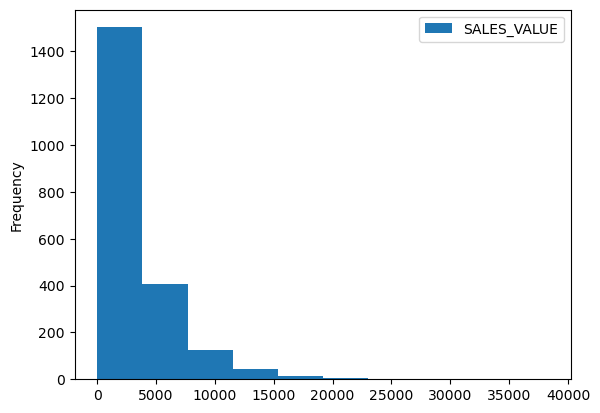

In [26]:
mask = transactions.groupby(['household_key'])["SALES_VALUE"].sum()
mask.plot.hist(legend = True)

In [36]:
top10quantity = (transactions.groupby(["household_key"])["QUANTITY"].sum()).sort_values(ascending = False).iloc[:10]
top10quantity

household_key
1023    4479917
755     3141769
1609    2146715
13      1863829
1430    1741892
1527    1734632
1762    1669880
707     1640193
1029    1496204
1314    1492863
Name: QUANTITY, dtype: int64

In [39]:
top10sale = (transactions.groupby(["household_key"])["SALES_VALUE"].sum().sort_values(ascending = False).iloc[:10])
top10sale

household_key
1023    38319.79
1609    27859.68
1453    21661.29
1430    20352.99
718     19299.86
707     19194.42
1653    19153.75
1111    18894.72
982     18790.34
400     18494.14
Name: SALES_VALUE, dtype: float64

<Axes: xlabel='household_key'>

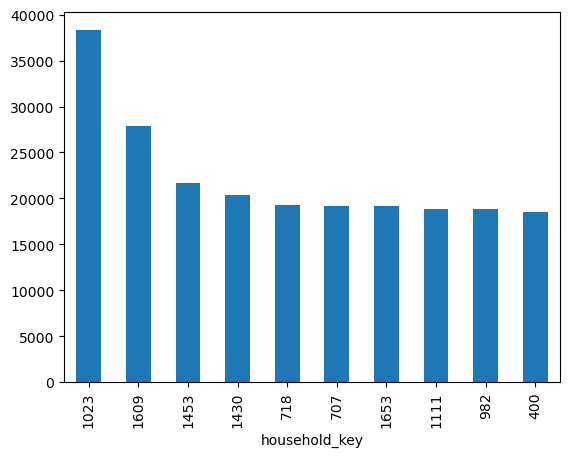

In [42]:
top10sale.plot.bar()

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

<Axes: xlabel='Amount', ylabel='Product_id'>

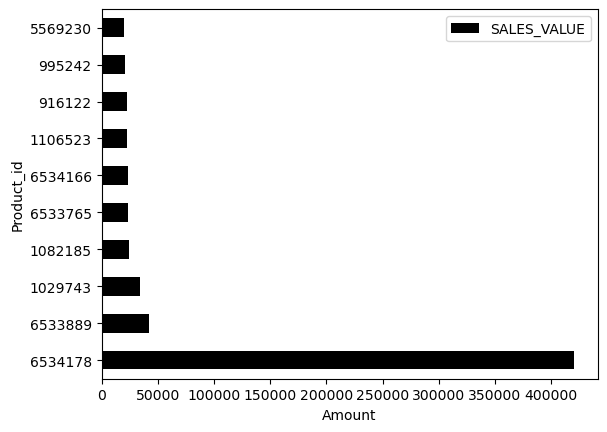

In [61]:
top10product = (transactions.groupby(["PRODUCT_ID"])["SALES_VALUE"].sum().sort_values(ascending = False).iloc[:10])
top10product.plot.barh(legend = True,
                     xlabel = 'Amount',
                     ylabel = "Product_id",
                      color = "black")


In [70]:
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products

disc = transactions.query("PRODUCT_ID in @top10product.index")["total_discount"].sum()
sale = transactions.query("PRODUCT_ID in @top10product.index")["SALES_VALUE"].sum()
disc/sale

-0.10331267387397927

In [72]:
products = pd.read_csv("../project_data/product.csv")

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [83]:
top_hh_products = transactions.query("household_key in @top10sale.index").loc[:,"PRODUCT_ID"].value_counts().iloc[:10].index
top_hh_products

Int64Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776,
            1106523,  981760, 9677202],
           dtype='int64')

In [85]:
products.query("PRODUCT_ID in @top_hh_products")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [89]:
products.query("PRODUCT_ID in @top10product.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [90]:
products.query("PRODUCT_ID == 6534178")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
